In [11]:
# To implement Breadth First Search (BFS)
from collections import deque

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

def bfs(start):
    visited = set()          # To keep track of visited nodes
    queue = deque([start])   # Initialize queue with the starting node

    while queue:
        node = queue.popleft()  # Dequeue the first element

        if node not in visited:
            print(node, end=" ")  # Process the node
            visited.add(node)

            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append(neighbor)


print("BFS Traversal starting from node A:")
bfs('A')




BFS Traversal starting from node A:
A B C D E F G 

In [12]:
# To implement Depth First Search


graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

def dfs(node, visited=None):
    if visited is None:
        visited = set()

    if node not in visited:
        print(node, end=" ")
        visited.add(node)


        for neighbor in graph[node]:
            dfs(neighbor, visited)


print("DFS Traversal starting from node A:")
dfs('A')




DFS Traversal starting from node A:
A B D E G C F 

In [13]:
import heapq

def a_star(graph, start, goal, heuristic):
    # Priority queue (min-heap): (estimated_total_cost, cost_so_far, current_node, path)
    queue = [(heuristic[start], 0, start, [])]
    visited = set()

    while queue:
        est_total, cost_so_far, node, path = heapq.heappop(queue)

        # Skip if node already visited
        if node in visited:
            continue

        visited.add(node)
        path = path + [node]

        # Goal reached
        if node == goal:
            return path

        # Explore neighbors
        for neighbor, edge_cost in graph.get(node, []):
            if neighbor not in visited:
                new_cost = cost_so_far + edge_cost
                new_est_total = new_cost + heuristic[neighbor]
                heapq.heappush(queue, (new_est_total, new_cost, neighbor, path))

    return Node
# Graph representation: node -> [(neighbor, cost), ...]
graph = {
    'A': [('B', 1), ('C', 3)],
    'B': [('D', 3), ('E', 1)],
    'C': [('F', 5)],
    'D': [],
    'E': [('G', 2)],
    'F': [],
    'G': []
}

# Heuristic values (estimated cost to reach the goal)
heuristic = {
    'A': 7,
    'B': 6,
    'C': 4,
    'D': 4,
    'E': 2,
    'F': 6,
    'G': 0  # Goal node has heuristic 0
}

start = 'A'
goal = 'G'

path = a_star(graph, start, goal, heuristic)

print("A* Path from", start, "to", goal, ":")
print(" → ".join(path) if path else "No path found")



A* Path from A to G :
A → B → E → G


In [14]:
def bayes_theorem(prior, likelihood, marginal):
    """
    Compute P(H|E) = (P(E|H) * P(H)) / P(E)
    """
    posterior = (likelihood * prior) / marginal
    return posterior


# Given data
P_disease = 0.01          # Prior: 1% of people have the disease
P_no_disease = 0.99

P_positive_given_disease = 0.99   # True positive rate
P_positive_given_no_disease = 0.05  # False positive rate (5%)

# Marginal probability (total probability of a positive test)
P_positive = (P_positive_given_disease * P_disease) + (P_positive_given_no_disease * P_no_disease)

# Apply Bayes’ theorem
P_disease_given_positive = bayes_theorem(P_disease, P_positive_given_disease, P_positive)

print(f"Probability of having the disease given a positive test: {P_disease_given_positive:.3f}")


Probability of having the disease given a positive test: 0.167


In [15]:
# To implement propostional logic using truth table
import itertools

def evaluate(expr, assignment):
    return expr(assignment)

def truth_table(variables, expr):
    for values in itertools.product([False, True], repeat=len(variables)):
        assignment = dict(zip(variables, values))
        result = evaluate(expr, assignment)
        print(assignment, "=>", result)

variables = ["P", "Q"]
expr = lambda a: ((not a["P"] or a["Q"]) and a["P"]) <= a["Q"]

print("Truth table for ((P → Q) ∧ P) → Q")
truth_table(variables, expr)



Truth table for ((P → Q) ∧ P) → Q
{'P': False, 'Q': False} => True
{'P': False, 'Q': True} => True
{'P': True, 'Q': False} => True
{'P': True, 'Q': True} => True


In [16]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample data
data = {
    'Age': [25, 27, 29, None, 31],
    'Salary': [50000, None, 52000, 55000, 58000],
    'Experience': [1, 3, None, 5, 6]
}

# Create DataFrame
df = pd.DataFrame(data)
print("Original data:")
print(df)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nImputed data:")
print(df_imputed)

# Standardize data (Z-score normalization)
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(df_imputed), columns=df.columns)
print("\nStandardized data (Z-score normalization):")
print(df_standardized)

Original data:
    Age   Salary  Experience
0  25.0  50000.0         1.0
1  27.0      NaN         3.0
2  29.0  52000.0         NaN
3   NaN  55000.0         5.0
4  31.0  58000.0         6.0

Imputed data:
    Age   Salary  Experience
0  25.0  50000.0        1.00
1  27.0  53750.0        3.00
2  29.0  52000.0        3.75
3  28.0  55000.0        5.00
4  31.0  58000.0        6.00

Standardized data (Z-score normalization):
   Age    Salary  Experience
0 -1.5 -1.383208   -1.601112
1 -0.5  0.000000   -0.436667
2  0.5 -0.645497    0.000000
3  0.0  0.461069    0.727778
4  1.5  1.567636    1.310001


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score , confusion_matrix

# Load data
data = load_breast_cancer()

X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nconfusion matrix: \n " ,confusion_matrix(y_test , y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9766081871345029

confusion matrix: 
  [[ 61   2]
 [  2 106]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



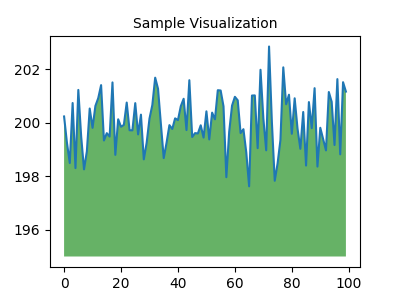

In [20]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

data = {
    'Imdb_Rating': [8.0, 6.2, 7.2, 8.2, 7.4],
    'Duration': [160, 170, 168, 155, 114],
    'Label': ['action', 'comedy', 'action', 'comedy', 'comedy']
}

df = pd.DataFrame(data)

X = df[['Imdb_Rating', 'Duration']]
Y = df['Label']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

barbie = [[7.5, 119]]

prediction = knn.predict(barbie)

print("predicted genre for barbie: ", prediction[0])

predicted genre for barbie:  comedy


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
